In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
File = "/content/FastagFraudDetection.csv"
df = pd.read_csv(File)

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
data = df.drop(columns=["Timestamp","Transaction_ID","FastagID","TollBoothID","Geographical_Location","Vehicle_Plate_Number"],axis = 1)

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
df.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
len(df)

5000

In [ ]:
df.shape

(5000, 13)

In [ ]:
data.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator
0,Bus,Express,Large,350,120,65,Fraud
1,Car,Regular,Small,120,100,78,Fraud
2,Motorcycle,Regular,Small,0,0,53,Not Fraud
3,Truck,Regular,Large,350,120,92,Fraud
4,Van,Express,Medium,140,100,60,Fraud


In [ ]:
data.isna().sum()

Vehicle_Type          0
Lane_Type             0
Vehicle_Dimensions    0
Transaction_Amount    0
Amount_paid           0
Vehicle_Speed         0
Fraud_indicator       0
dtype: int64

In [ ]:
len(data)

5000

In [ ]:
data['Fraud_indicator'].value_counts()

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64

In [ ]:
data['Vehicle_Type'].value_counts()

Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: Vehicle_Type, dtype: int64

In [ ]:
data['Lane_Type'].value_counts()

Regular    2858
Express    2142
Name: Lane_Type, dtype: int64

In [ ]:
data['Vehicle_Dimensions'].value_counts()

Large     2144
Small     1428
Medium    1428
Name: Vehicle_Dimensions, dtype: int64

In [ ]:
data.nunique()

Vehicle_Type           7
Lane_Type              2
Vehicle_Dimensions     3
Transaction_Amount    20
Amount_paid           23
Vehicle_Speed         85
Fraud_indicator        2
dtype: int64

In [ ]:
data.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator
0,Bus,Express,Large,350,120,65,Fraud
1,Car,Regular,Small,120,100,78,Fraud
2,Motorcycle,Regular,Small,0,0,53,Not Fraud
3,Truck,Regular,Large,350,120,92,Fraud
4,Van,Express,Medium,140,100,60,Fraud


In [ ]:
data['Lane_Type'].nunique()

2

In [ ]:
data['Vehicle_Type'].unique()

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

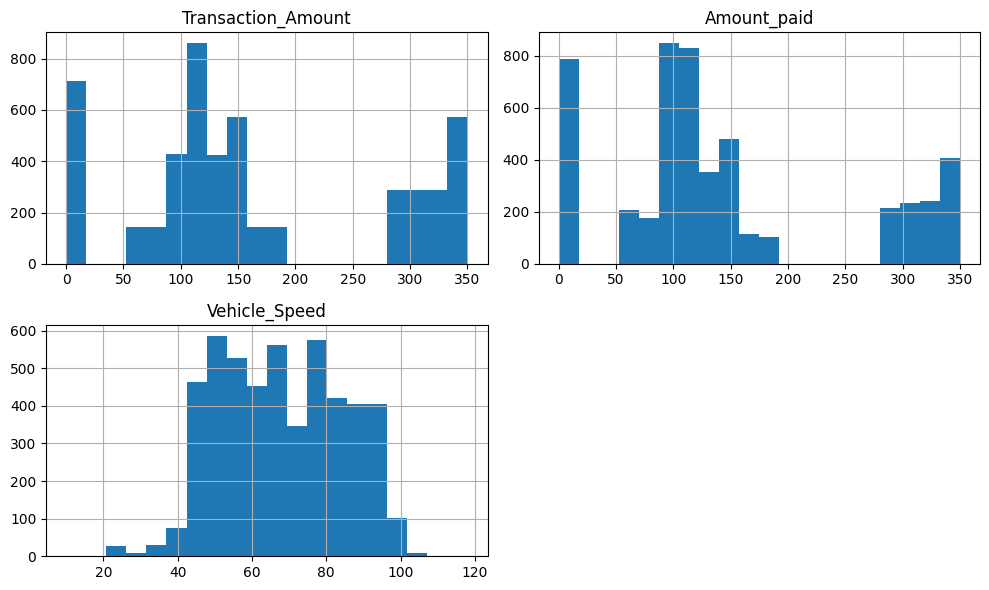

In [ ]:
# Histograms for numerical features
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
data[numerical_features].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

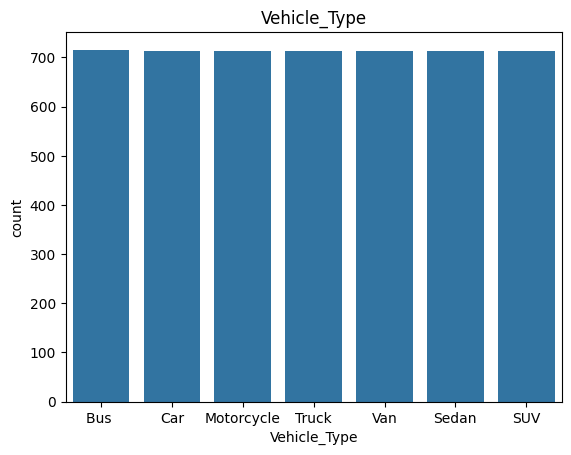

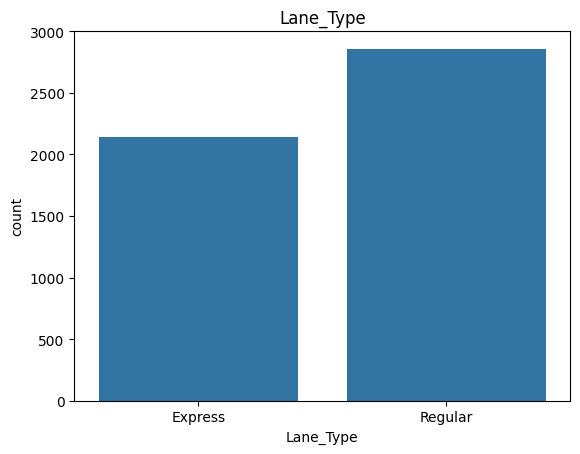

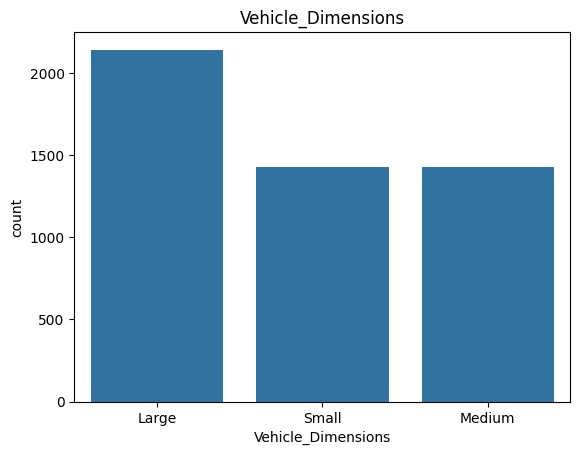

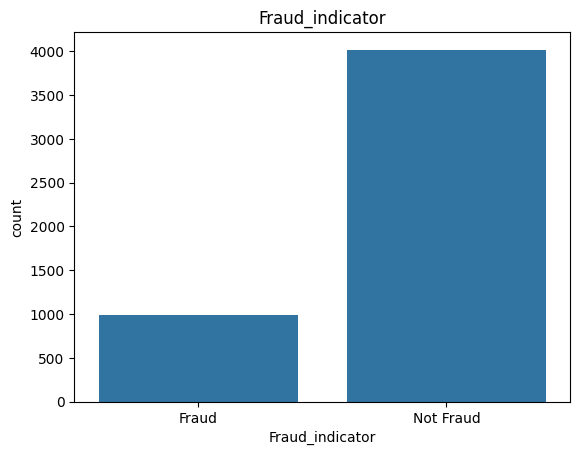

In [ ]:
# Bar plots for categorical features
categorical_features = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'Fraud_indicator']
for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.title(feature)
    plt.show()

<ipython-input-78-5596473792d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


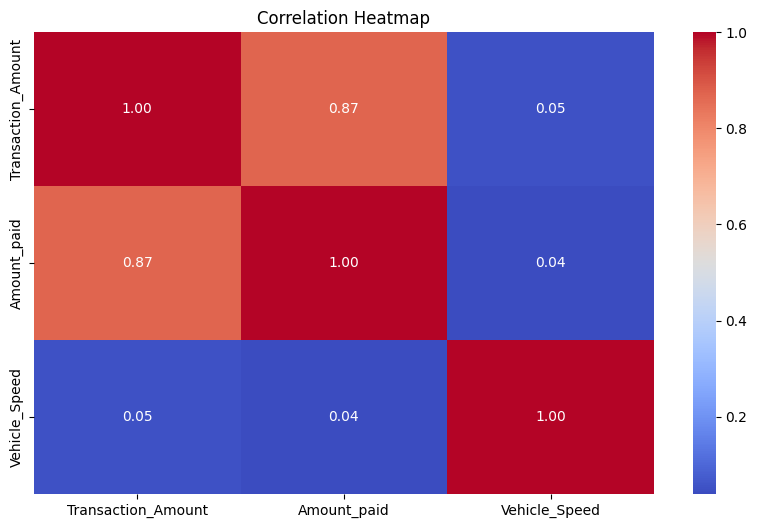

In [ ]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

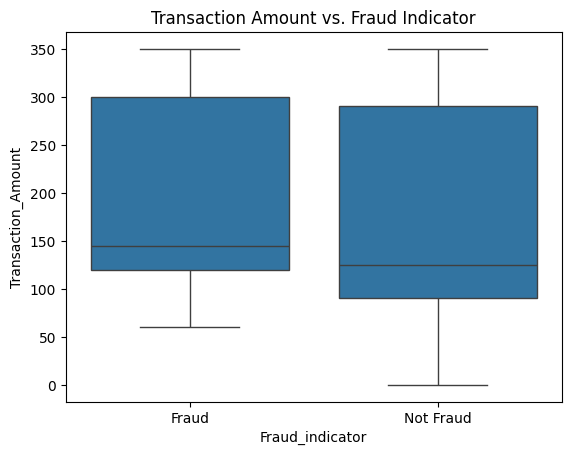

In [ ]:
# Relationship between Transaction_Amount and Fraud_indicator
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=data)
plt.title('Transaction Amount vs. Fraud Indicator')
plt.show()

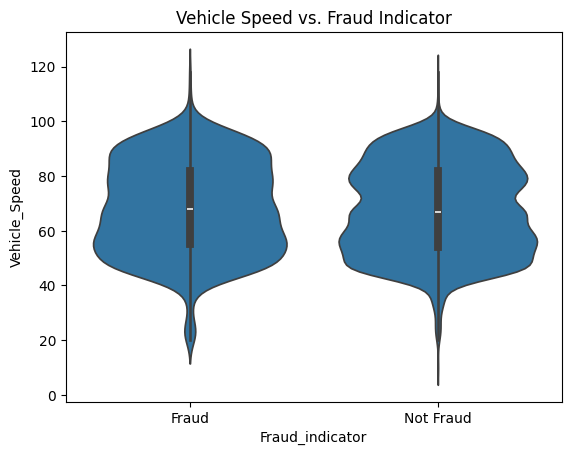

In [ ]:
# Relationship between Vehicle_Speed and Fraud_indicator
sns.violinplot(x='Fraud_indicator', y='Vehicle_Speed', data=data)
plt.title('Vehicle Speed vs. Fraud Indicator')
plt.show()

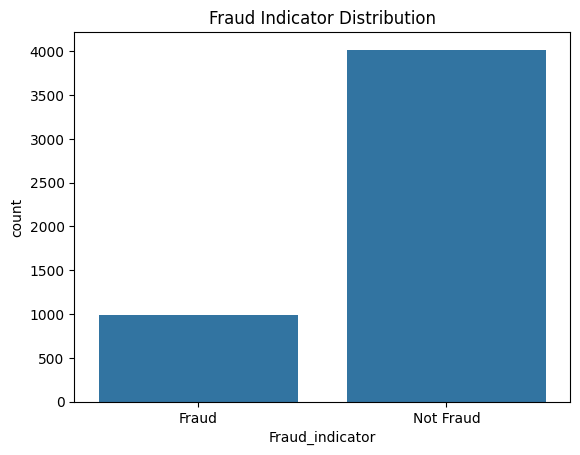

In [ ]:
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Fraud Indicator Distribution')
plt.show()

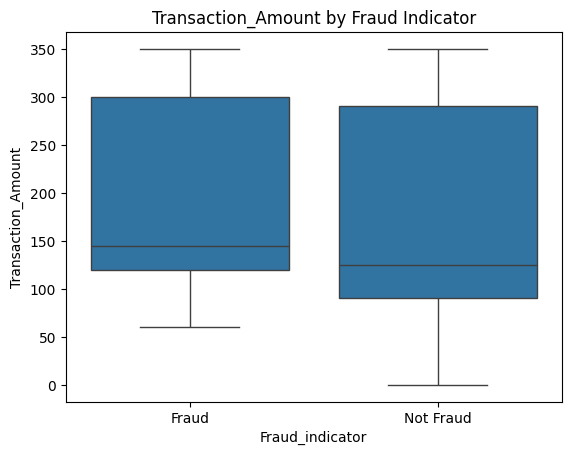

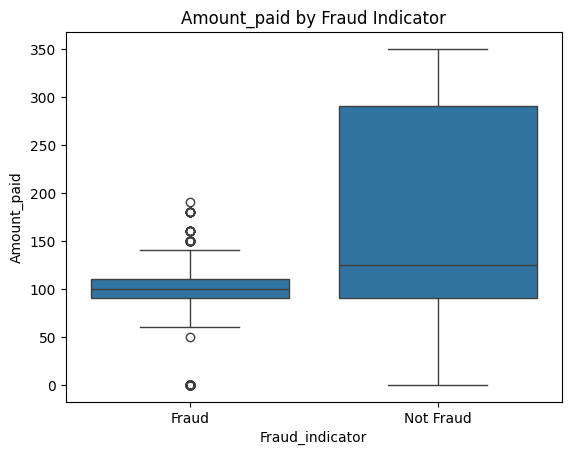

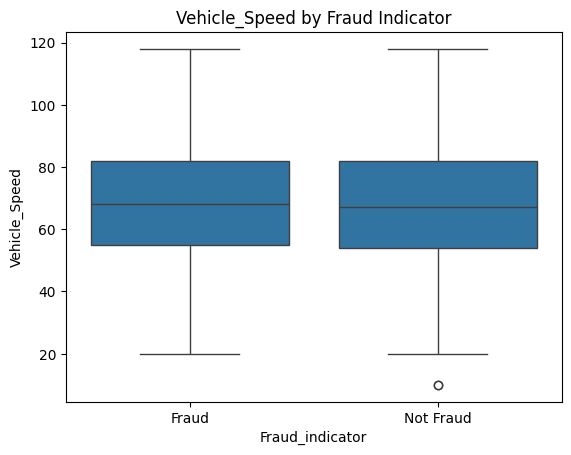

In [ ]:
for feature in numerical_features:
    sns.boxplot(x='Fraud_indicator', y=feature, data=data)
    plt.title('{} by Fraud Indicator'.format(feature))
    plt.show()

In [ ]:
data_for_analysis = data

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
data['Vehicle_Dimensions'] = label_encoder.fit_transform(data['Vehicle_Dimensions'])
data['Lane_Type'] = label_encoder.fit_transform(data['Lane_Type'])
data['Vehicle_Type'] = label_encoder.fit_transform(data['Vehicle_Type'])
data['Fraud_indicator'] = label_encoder.fit_transform(data['Fraud_indicator'])


In [ ]:
data.head()

,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator
0,0,0,0,350,120,65,0
1,1,1,2,120,100,78,0
2,2,1,2,0,0,53,1
3,5,1,0,350,120,92,0
4,6,0,1,140,100,60,0


In [ ]:
X = data.drop(columns=['Fraud_indicator'])
y = data['Fraud_indicator']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_classifier.predict(X_test)


Confusion Matrix:
[[212   5]
 [  0 783]]


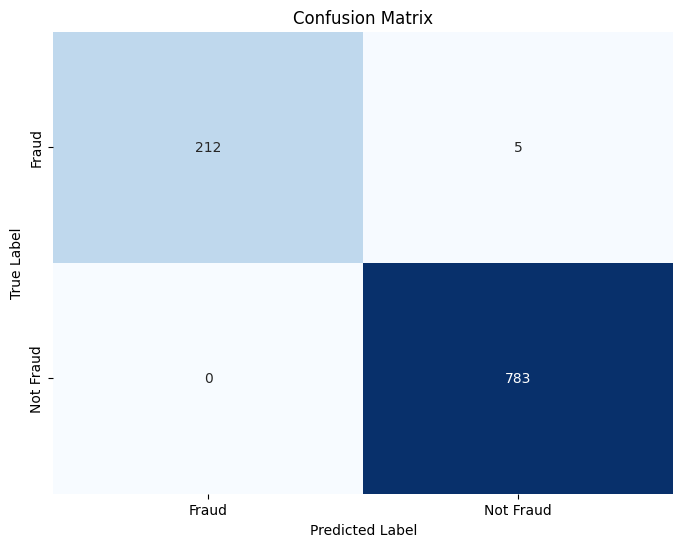

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fraud', 'Not Fraud'], yticklabels=['Fraud', 'Not Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)


Support Vector Machine Confusion Matrix:
[[200  17]
 [  0 783]]


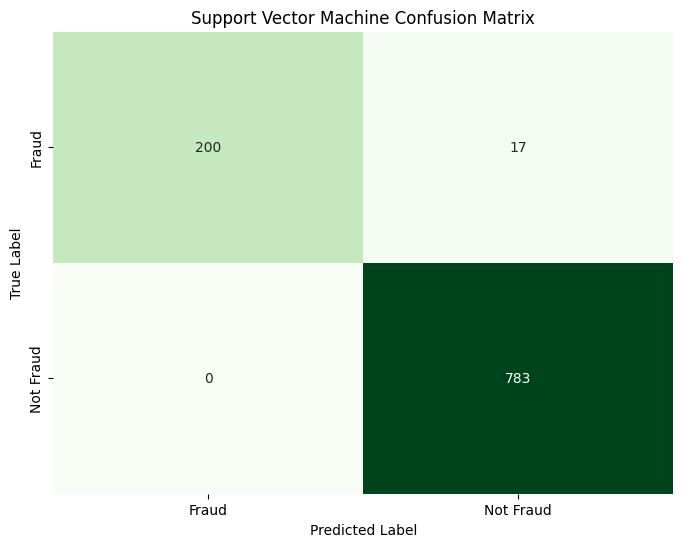

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSupport Vector Machine Confusion Matrix:")
print(conf_matrix_svm)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Fraud', 'Not Fraud'], yticklabels=['Fraud', 'Not Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [ ]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Make predictions using Gradient Boosting
y_pred_gb = gb_classifier.predict(X_test)

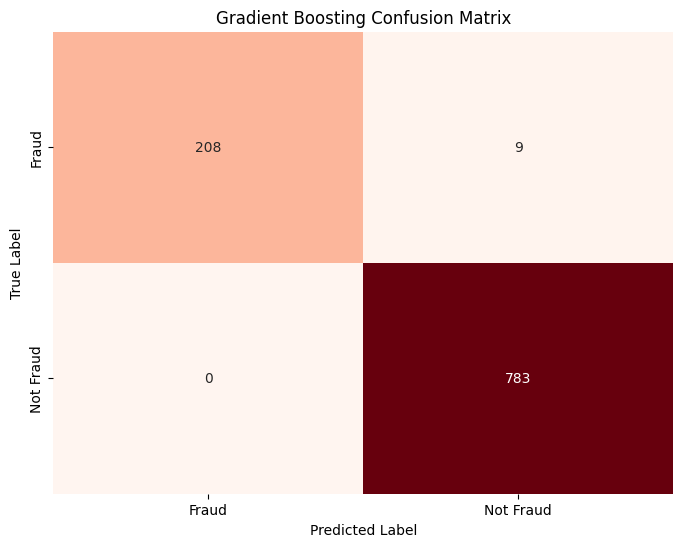

In [ ]:
# Plot confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Fraud', 'Not Fraud'], yticklabels=['Fraud', 'Not Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [ ]:
# Initialize and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions using Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)


Logistic Regression Confusion Matrix:
[[200  17]
 [  0 783]]


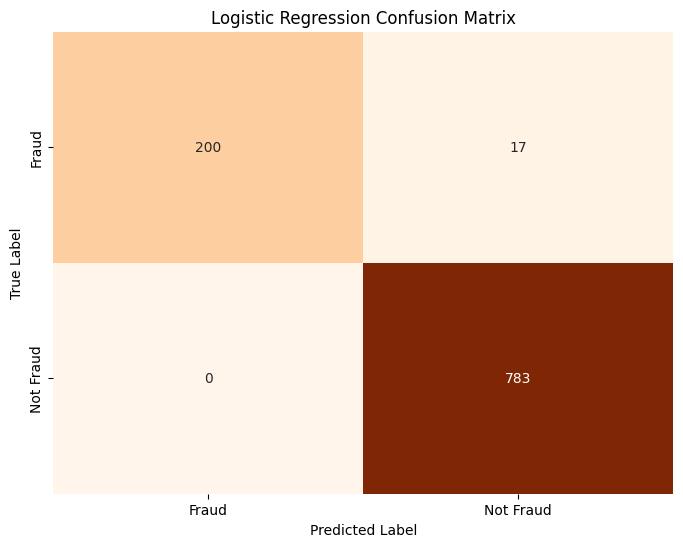

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lr)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Fraud', 'Not Fraud'], yticklabels=['Fraud', 'Not Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf_predictions = rf_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
lr_predictions = logistic_regression.predict(X_test)
svc_predictions = svm_classifier.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("SVC Accuracy:", svc_accuracy)

Random Forest Accuracy: 0.995
Gradient Boosting Accuracy: 0.991
Logistic Regression Accuracy: 0.983
SVC Accuracy: 0.983


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)

In [ ]:
print("Random Forest Evaluation Metrics:")
print_evaluation_metrics(y_test, rf_predictions)
print()

Random Forest Evaluation Metrics:
Accuracy: 0.995
F1 Score: 0.9968173138128581
Recall: 1.0
Precision: 0.9936548223350253



In [ ]:
# Print evaluation metrics for Gradient Boosting
print("Gradient Boosting Evaluation Metrics:")
print_evaluation_metrics(y_test, gb_predictions)
print()

Gradient Boosting Evaluation Metrics:
Accuracy: 0.991
F1 Score: 0.9942857142857142
Recall: 1.0
Precision: 0.9886363636363636



In [ ]:
# Print evaluation metrics for Logistic Regression
print("Logistic Regression Evaluation Metrics:")
print_evaluation_metrics(y_test, lr_predictions)
print()

Logistic Regression Evaluation Metrics:
Accuracy: 0.983
F1 Score: 0.9892608970309539
Recall: 1.0
Precision: 0.97875



In [ ]:
# Print evaluation metrics for SVC
print("SVC Evaluation Metrics:")
print_evaluation_metrics(y_test, svc_predictions)

SVC Evaluation Metrics:
Accuracy: 0.983
F1 Score: 0.9892608970309539
Recall: 1.0
Precision: 0.97875
